<a href="https://colab.research.google.com/github/OleksiiLozovyi/goit-ds-hw-12/blob/main/Hw12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

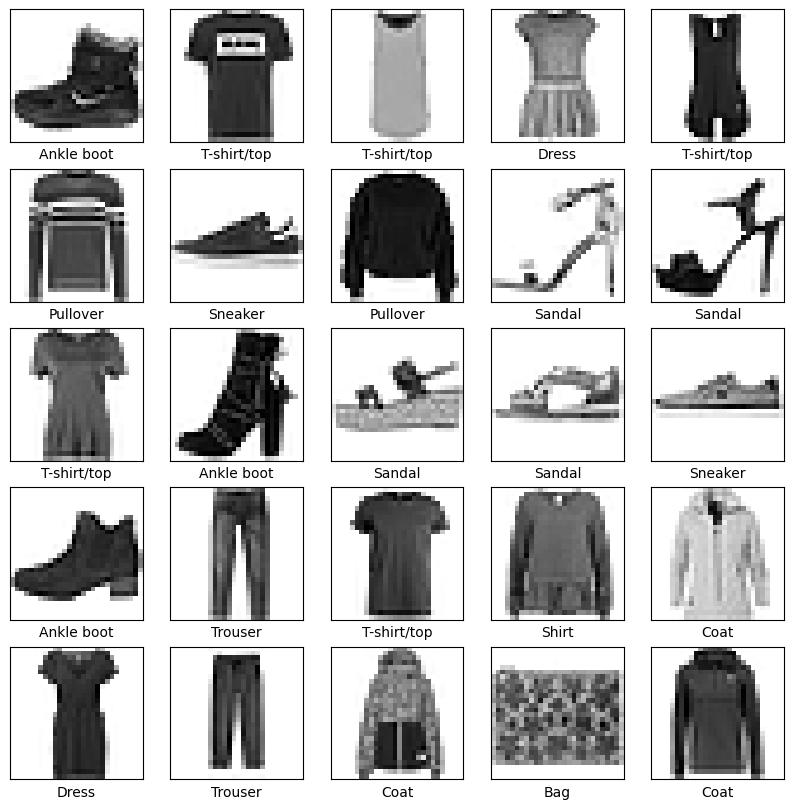

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Розгортання 2D зображень у 1D
    layers.Dense(128, activation='relu'),  # Повнозв'язний шар
    layers.Dropout(0.2),                  # Dropout для регуляризації
    layers.Dense(64, activation='relu'),  # Ще один повнозв'язний шар
    layers.Dense(10, activation='softmax') # Вихідний шар із 10 класами
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7405 - loss: 0.7388 - val_accuracy: 0.8418 - val_loss: 0.4298
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8437 - loss: 0.4195 - val_accuracy: 0.8671 - val_loss: 0.3742
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8576 - loss: 0.3810 - val_accuracy: 0.8691 - val_loss: 0.3614
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8669 - loss: 0.3597 - val_accuracy: 0.8729 - val_loss: 0.3518
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8705 - loss: 0.3442 - val_accuracy: 0.8644 - val_loss: 0.3720
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8769 - loss: 0.3308 - val_accuracy: 0.8769 - val_loss: 0.3395
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8847 - loss: 0.3088 - val_accuracy: 0.8813 - val_loss: 0.3242
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8802 - loss: 0.3181 - 

In [8]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.8826 - loss: 0.3388
Test accuracy: 0.8826


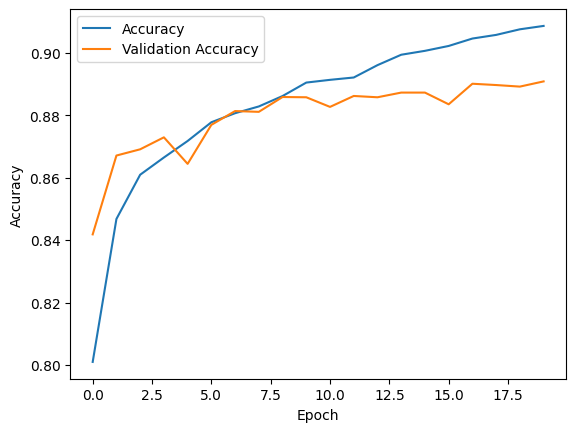

In [9]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

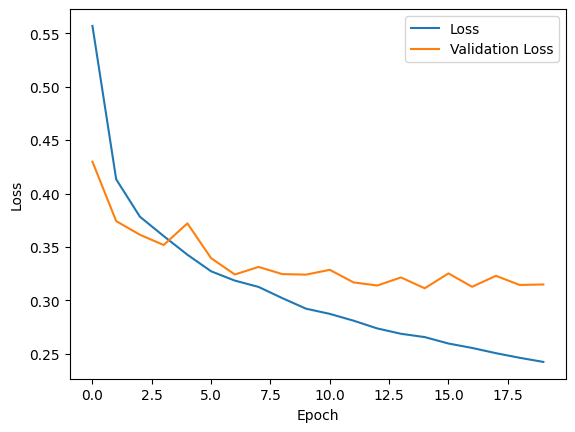

In [10]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
predictions = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


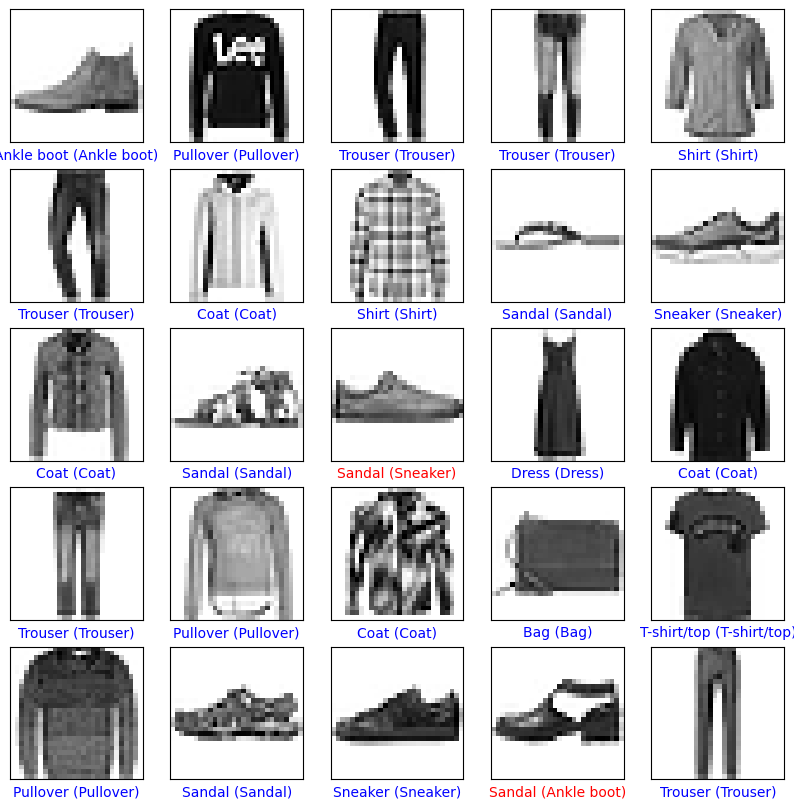

In [12]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)
plt.show()